<h1>Calculation of Dipole Transition Matrix Elements for Hydrogen-like Orbitals</h1>
<h2>Background</h2>
<h3>High Harmonic Generation</h3>

According to the Lewenstein model [1], we can calculate the dipole moment as
$$\vec{x}(t_r) \simeq 2\mathbb{R}\left\{\int_{t_i}^{t_r} \mathrm{d}t\, 
\vec{d}^\ast\left(\vec{p}_{st} + \vec{A}(t_r)\right)
e^{-iS(\vec{p}_{st}, t_r, t_i)}
\left[\vec{E}(t_i)\cdot\vec{d}\left(\vec{p}_{st}+\vec{A}(t_i)\right)\right]\right\}.$$

The dipole transition matrix elements can be calculated using
$$\vec{d}(\psi_f, \psi_i) = \langle\psi_f|\vec{r}|\psi_i\rangle.$$

Under the strong-field approximation, we replace the final state as that of a plane wave with asymptotic momentum $\vec{p}$, yielding
$$\begin{matrix}
\vec{d}(\vec{p}) & \simeq & \int \mathrm{d}\vec{r}\, e^{-i\vec{p}\cdot\vec{r}}\vec{r}\psi_0(\vec{r})\\
& = & i\nabla\tilde{\phi_0}(\vec{p})
\end{matrix}.$$
Thus we can approximate the dipole transition matrix elements using the gradient of the ground-state orbital in momentum space.

<h3>Hydrogen-like Orbitals</h3>

The momentum distribution of a hydrogen-like orbital in spherical co-ordinates is given as [2]
$$
\varUpsilon_{nlm}\left(p, \theta,\phi\right) = 
\frac{\pi 2^{2l+4} l!}{\left(2\pi\gamma\right)^{3/2}}
\sqrt{\frac{n(n-l-1)!}{(n+l)!}}
\frac{\zeta^l}{(\zeta^2+1)^{l+2}} C_{n-l-1}^{l+1}\left(\frac{\zeta^2-1}{\zeta^2+1}\right)Z_l^m(\theta, \phi),
$$
whereby I have used the real forms of the spherical harmonics:
$$
Z_n^m(\theta, \phi) = \left\{
\begin{array}\\
\frac{1}{\sqrt{2}}\left[Y_n^m(\theta, \phi) + \overline{Y_n^m}(\theta, \phi)\right] & \mbox{if } m>0\\
Y_n^m(\theta, \phi) & \mbox{if } m=0\\
\frac{1}{i\sqrt{2}}\left[Y_n^m(\theta, \phi) - \overline{Y_n^m}(\theta, \phi)\right] & \mbox{if } m<0
\end{array}
\right.
$$

For s-orbitals, $l=m=0$ and for p-orbitals, $l=1$ and $m=\{-1, 0, 1\}$. For the real orbitals defined above, $m=1$ results in the $np_x$ orbital, $m=-1$ gives the $np_y$ orbital and $m=0$ gives the $np_z$ orbital whereby the subscript is the "axis of revolution" of the radial function.

<ol>
    <li>M. Lewenstein et al., Theory of high-harmonic generation by low-frequency laser fields. Phys. Rev. A. 49, 2117–2132 (1994).</li>
    <li>B. Podolsky, L. Pauling, The momentum distribution in hydrogen-like atoms. Phys. Rev. 34, 109–116 (1929).</li>
</ol>


In [1]:
from sympy import *

init_printing(use_latex=True)

#n = Symbol("n", positive=True, integer=True)
#l = Symbol("l", nonegative=True, integer=True)
#m = Symbol("n", integer=True)
p = Symbol("p", positive=True)
theta = Symbol("theta", real=True)
phi = Symbol("phi", real=True)
Ip = Symbol("I_p", positive=True)
gamma = Symbol("gamma", positive=True)

<h2>Rotation Matrix</h2>
Convert from Spherical to Cartesian vector. Note R<sup>-1</sup> = R<sup>T</sup>, but I've calculated the inverse of R<sub>C&rarr;S</sub>.

In [2]:
R = Matrix([[sin(theta)*cos(phi), sin(theta)*sin(phi), cos(theta)],
       [cos(theta)*cos(phi), cos(theta)*sin(phi), -sin(theta)],
       [-sin(phi), cos(phi), 0]])
display("Rotation matrix (Cartesian --> Spherical):", R)
R = simplify(R.inv())
display("Rotation matrix (Spherical --> Cartesian):", R)

'Rotation matrix (Cartesian --> Spherical):'

⎡sin(θ)⋅cos(φ)  sin(φ)⋅sin(θ)  cos(θ) ⎤
⎢                                     ⎥
⎢cos(φ)⋅cos(θ)  sin(φ)⋅cos(θ)  -sin(θ)⎥
⎢                                     ⎥
⎣   -sin(φ)        cos(φ)         0   ⎦

'Rotation matrix (Spherical --> Cartesian):'

⎡sin(θ)⋅cos(φ)  cos(φ)⋅cos(θ)  -sin(φ)⎤
⎢                                     ⎥
⎢sin(φ)⋅sin(θ)  sin(φ)⋅cos(θ)  cos(φ) ⎥
⎢                                     ⎥
⎣   cos(θ)         -sin(θ)        0   ⎦

<h2>Hydrogen-like Orbital</h2>

Define hydrogen-like orbital in spherical momentum space

In [3]:
def Dipole(n, l, m, px=Symbol("p_x", real=True), py=Symbol("p_y", real=True)):
    # Define some parameters
    #gamma = sqrt(2*Ip)
    zeta = p/gamma
    Upsilon = (2**(2*l+4) * factorial(l) / (sqrt(pi)*(2*gamma)**Rational(3/2)) \
        * sqrt(n*factorial(n-l-1)/factorial(n+l)) \
        * (zeta**l/(zeta**2+1)**(l+2))*gegenbauer(n-l-1, l+1, (zeta**2-1)/(zeta**2+1)) \
        * Znm(l, m, theta, phi)).subs(zeta, p/gamma)
    
    # Hydrogen-like orbital
    Upsilon = simplify(expand_func(Upsilon))
    
    # Dipole transition matrix element (in spherical co-ordinates)
    Spherical = Matrix([diff(Upsilon, p),
        diff(Upsilon, theta)/p,
        diff(Upsilon, phi)/(p*sin(theta))])
    
    # Convert to Cartesian co-ordinates
    Cartesian = R*Spherical
    
    # Substitute theta, phi
    #Upsilon = simplify(factor(Upsilon.subs([(theta, pi/2), (cos(phi), px/p), (sin(phi), py/p)])))
    Spherical = Matrix([simplify(factor(d.subs([(theta, pi/2), (cos(phi), px/p), (sin(phi), py/p)]))) for d in Spherical])
    Cartesian = Matrix([simplify(factor(d.subs([(theta, pi/2), (cos(phi), px/p), (sin(phi), py/p)]))) for d in Cartesian])
    Cartesian[0] = Cartesian[0].replace(py**2, p**2-px**2).simplify().factor().collect(px)
    Cartesian[1] = Cartesian[1].replace(px**2, p**2-py**2).simplify().factor().collect(py)
    return Cartesian, Spherical, Upsilon

<h2>Dipole Transition Matrix Elements</h2>

Note for $l>0$, $m=0$ and $\vec{E}=\alpha\hat{x} + \beta\hat{y}$ we find $\vec{d}_\vec{p} = \gamma\hat{z}$ and thus $\vec{E}\cdot\vec{d}_\vec{p}=0$ so that this component can be neglected.

For example, here are the results for the $2p_z$ orbital:

'2p_z orbital:'

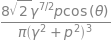

'2p_z Transition (p, theta, phi):'

⎡     0      ⎤
⎢            ⎥
⎢       7/2  ⎥
⎢-8⋅√2⋅γ     ⎥
⎢────────────⎥
⎢           3⎥
⎢  ⎛ 2    2⎞ ⎥
⎢π⋅⎝γ  + p ⎠ ⎥
⎢            ⎥
⎣     0      ⎦

'2p_z Transition (x, y, z):'

⎡     0      ⎤
⎢            ⎥
⎢     0      ⎥
⎢            ⎥
⎢       7/2  ⎥
⎢ 8⋅√2⋅γ     ⎥
⎢────────────⎥
⎢           3⎥
⎢  ⎛ 2    2⎞ ⎥
⎣π⋅⎝γ  + p ⎠ ⎦

In [4]:
DC, DS, U = Dipole(2,1,0)
display("2p_z orbital:", U, "2p_z Transition (p, theta, phi):", DS, "2p_z Transition (x, y, z):", DC)

In the results below, the dipole transition matrix element vector is given in Cartesian co-ordinates (left) and spherical co-ordinates (right) for a given orbital.

<h3>Linear Polarisation</h3>

$$
\vec{E} = E_0f(t)\cos(\omega t)\hat{x}\\
\vec{p} = p\hat{x}
$$

In [5]:
Dipole(3,2,0,p,0)[0]

⎡    9/2   ⎛   2      2⎞⎤
⎢32⋅γ   ⋅p⋅⎝- γ  + 3⋅p ⎠⎥
⎢───────────────────────⎥
⎢                5      ⎥
⎢       ⎛ 2    2⎞       ⎥
⎢     π⋅⎝γ  + p ⎠       ⎥
⎢                       ⎥
⎢           0           ⎥
⎢                       ⎥
⎣           0           ⎦

In [6]:
sep = "".join(["=" for n in range(40)])
display([Matrix(["x", "y", "z"]), Matrix(["p", "theta", "phi"])], sep)
for n in range(6):
    for l in range(min(n, 2)):
        for m in range(0, l+1):
            if l>0 and m==0: continue
            DC, DS, _ = Dipole(n, l, m, p, 0)
            display(["n="+str(n), "l="+str(l), "m="+str(m)], [DC, DS], sep)

⎡⎡x⎤  ⎡p⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢y⎥, ⎢θ⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣z⎦  ⎣φ⎦⎦

'========================================'

['n=1', 'l=0', 'm=0']

⎡⎡       5/2   ⎤  ⎡       5/2   ⎤⎤
⎢⎢-8⋅√2⋅γ   ⋅p ⎥  ⎢-8⋅√2⋅γ   ⋅p ⎥⎥
⎢⎢─────────────⎥  ⎢─────────────⎥⎥
⎢⎢           3 ⎥  ⎢           3 ⎥⎥
⎢⎢  ⎛ 2    2⎞  ⎥  ⎢  ⎛ 2    2⎞  ⎥⎥
⎢⎢π⋅⎝γ  + p ⎠  ⎥, ⎢π⋅⎝γ  + p ⎠  ⎥⎥
⎢⎢             ⎥  ⎢             ⎥⎥
⎢⎢      0      ⎥  ⎢      0      ⎥⎥
⎢⎢             ⎥  ⎢             ⎥⎥
⎣⎣      0      ⎦  ⎣      0      ⎦⎦

'========================================'

['n=2', 'l=0', 'm=0']

⎡⎡        5/2   ⎛     2    2⎞ ⎤  ⎡       5/2   ⎛   2    2⎞⎤⎤
⎢⎢-16⋅√2⋅γ   ⋅p⋅⎝- 2⋅γ  + p ⎠ ⎥  ⎢16⋅√2⋅γ   ⋅p⋅⎝2⋅γ  - p ⎠⎥⎥
⎢⎢────────────────────────────⎥  ⎢────────────────────────⎥⎥
⎢⎢                   4        ⎥  ⎢                 4      ⎥⎥
⎢⎢          ⎛ 2    2⎞         ⎥  ⎢        ⎛ 2    2⎞       ⎥⎥
⎢⎢        π⋅⎝γ  + p ⎠         ⎥, ⎢      π⋅⎝γ  + p ⎠       ⎥⎥
⎢⎢                            ⎥  ⎢                        ⎥⎥
⎢⎢             0              ⎥  ⎢           0            ⎥⎥
⎢⎢                            ⎥  ⎢                        ⎥⎥
⎣⎣             0              ⎦  ⎣           0            ⎦⎦

'========================================'

['n=2', 'l=1', 'm=1']

⎡⎡      7/2 ⎛   2      2⎞⎤  ⎡      7/2 ⎛   2      2⎞⎤⎤
⎢⎢8⋅√2⋅γ   ⋅⎝- γ  + 5⋅p ⎠⎥  ⎢8⋅√2⋅γ   ⋅⎝- γ  + 5⋅p ⎠⎥⎥
⎢⎢───────────────────────⎥  ⎢───────────────────────⎥⎥
⎢⎢                4      ⎥  ⎢                4      ⎥⎥
⎢⎢       ⎛ 2    2⎞       ⎥  ⎢       ⎛ 2    2⎞       ⎥⎥
⎢⎢     π⋅⎝γ  + p ⎠       ⎥, ⎢     π⋅⎝γ  + p ⎠       ⎥⎥
⎢⎢                       ⎥  ⎢                       ⎥⎥
⎢⎢           0           ⎥  ⎢           0           ⎥⎥
⎢⎢                       ⎥  ⎢                       ⎥⎥
⎣⎣           0           ⎦  ⎣           0           ⎦⎦

'========================================'

['n=3', 'l=0', 'm=0']

⎡⎡       5/2   ⎛    4       2  2      4⎞ ⎤  ⎡       5/2   ⎛    4       2  2    ↪
⎢⎢-8⋅√2⋅γ   ⋅p⋅⎝11⋅γ  - 18⋅γ ⋅p  + 3⋅p ⎠ ⎥  ⎢-8⋅√2⋅γ   ⋅p⋅⎝11⋅γ  - 18⋅γ ⋅p  +  ↪
⎢⎢───────────────────────────────────────⎥  ⎢───────────────────────────────── ↪
⎢⎢                        5              ⎥  ⎢                        5         ↪
⎢⎢               ⎛ 2    2⎞               ⎥  ⎢               ⎛ 2    2⎞          ↪
⎢⎢             π⋅⎝γ  + p ⎠               ⎥, ⎢             π⋅⎝γ  + p ⎠          ↪
⎢⎢                                       ⎥  ⎢                                  ↪
⎢⎢                   0                   ⎥  ⎢                   0              ↪
⎢⎢                                       ⎥  ⎢                                  ↪
⎣⎣                   0                   ⎦  ⎣                   0              ↪

↪    4⎞ ⎤⎤
↪ 3⋅p ⎠ ⎥⎥
↪ ──────⎥⎥
↪       ⎥⎥
↪       ⎥⎥
↪       ⎥⎥
↪       ⎥⎥
↪       ⎥⎥
↪       ⎥⎥
↪       ⎦⎦

'========================================'

['n=3', 'l=1', 'm=1']

⎡⎡       7/2 ⎛ 4       2  2      4⎞⎤  ⎡       7/2 ⎛ 4       2  2      4⎞⎤⎤
⎢⎢16⋅√3⋅γ   ⋅⎝γ  - 10⋅γ ⋅p  + 5⋅p ⎠⎥  ⎢16⋅√3⋅γ   ⋅⎝γ  - 10⋅γ ⋅p  + 5⋅p ⎠⎥⎥
⎢⎢─────────────────────────────────⎥  ⎢─────────────────────────────────⎥⎥
⎢⎢                     5           ⎥  ⎢                     5           ⎥⎥
⎢⎢            ⎛ 2    2⎞            ⎥  ⎢            ⎛ 2    2⎞            ⎥⎥
⎢⎢          π⋅⎝γ  + p ⎠            ⎥, ⎢          π⋅⎝γ  + p ⎠            ⎥⎥
⎢⎢                                 ⎥  ⎢                                 ⎥⎥
⎢⎢                0                ⎥  ⎢                0                ⎥⎥
⎢⎢                                 ⎥  ⎢                                 ⎥⎥
⎣⎣                0                ⎦  ⎣                0                ⎦⎦

'========================================'

['n=4', 'l=0', 'm=0']

⎡⎡        5/2   ⎛     6       4  2       2  4    6⎞ ⎤  ⎡       5/2   ⎛   6     ↪
⎢⎢-32⋅√2⋅γ   ⋅p⋅⎝- 6⋅γ  + 21⋅γ ⋅p  - 12⋅γ ⋅p  + p ⎠ ⎥  ⎢32⋅√2⋅γ   ⋅p⋅⎝6⋅γ  - 2 ↪
⎢⎢──────────────────────────────────────────────────⎥  ⎢────────────────────── ↪
⎢⎢                              6                   ⎥  ⎢                       ↪
⎢⎢                     ⎛ 2    2⎞                    ⎥  ⎢                   ⎛ 2 ↪
⎢⎢                   π⋅⎝γ  + p ⎠                    ⎥, ⎢                 π⋅⎝γ  ↪
⎢⎢                                                  ⎥  ⎢                       ↪
⎢⎢                        0                         ⎥  ⎢                       ↪
⎢⎢                                                  ⎥  ⎢                       ↪
⎣⎣                        0                         ⎦  ⎣                       ↪

↪    4  2       2  4    6⎞⎤⎤
↪ 1⋅γ ⋅p  + 12⋅γ ⋅p  - p ⎠⎥⎥
↪ ────────────────────────⎥⎥
↪       6                 ⎥⎥
↪     2⎞                  ⎥⎥
↪  + p ⎠                  ⎥⎥
↪              

'========================================'

['n=4', 'l=1', 'm=1']

⎡⎡        7/2 ⎛     6       4  2        2  4       6⎞⎤  ⎡        7/2 ⎛     6   ↪
⎢⎢16⋅√10⋅γ   ⋅⎝- 5⋅γ  + 87⋅γ ⋅p  - 123⋅γ ⋅p  + 25⋅p ⎠⎥  ⎢16⋅√10⋅γ   ⋅⎝- 5⋅γ  + ↪
⎢⎢───────────────────────────────────────────────────⎥  ⎢───────────────────── ↪
⎢⎢                               6                   ⎥  ⎢                      ↪
⎢⎢                      ⎛ 2    2⎞                    ⎥  ⎢                      ↪
⎢⎢                  5⋅π⋅⎝γ  + p ⎠                    ⎥, ⎢                  5⋅π ↪
⎢⎢                                                   ⎥  ⎢                      ↪
⎢⎢                         0                         ⎥  ⎢                      ↪
⎢⎢                                                   ⎥  ⎢                      ↪
⎣⎣                         0                         ⎦  ⎣                      ↪

↪      4  2        2  4       6⎞⎤⎤
↪  87⋅γ ⋅p  - 123⋅γ ⋅p  + 25⋅p ⎠⎥⎥
↪ ──────────────────────────────⎥⎥
↪           6                   ⎥⎥
↪  ⎛ 2    2⎞                    ⎥⎥
↪ ⋅⎝γ  + p ⎠  

'========================================'

['n=5', 'l=0', 'm=0']

⎡⎡       5/2   ⎛     2    2⎞ ⎛      6       4  2       2  4      6⎞ ⎤  ⎡       ↪
⎢⎢-8⋅√2⋅γ   ⋅p⋅⎝- 3⋅γ  + p ⎠⋅⎝- 15⋅γ  + 87⋅γ ⋅p  - 85⋅γ ⋅p  + 5⋅p ⎠ ⎥  ⎢-8⋅√2⋅ ↪
⎢⎢──────────────────────────────────────────────────────────────────⎥  ⎢────── ↪
⎢⎢                                      7                           ⎥  ⎢       ↪
⎢⎢                             ⎛ 2    2⎞                            ⎥  ⎢       ↪
⎢⎢                           π⋅⎝γ  + p ⎠                            ⎥, ⎢       ↪
⎢⎢                                                                  ⎥  ⎢       ↪
⎢⎢                                0                                 ⎥  ⎢       ↪
⎢⎢                                                                  ⎥  ⎢       ↪
⎣⎣                                0                                 ⎦  ⎣       ↪

↪  5/2   ⎛   2    2⎞ ⎛    6       4  2       2  4      6⎞ ⎤⎤
↪ γ   ⋅p⋅⎝3⋅γ  - p ⎠⋅⎝15⋅γ  - 87⋅γ ⋅p  + 85⋅γ ⋅p  - 5⋅p ⎠ ⎥⎥
↪ ────────────────────────────────────────────────────────⎥⎥
↪     

'========================================'

['n=5', 'l=1', 'm=1']

⎡⎡    7/2 ⎛   8        6  2        4  4        2  6       8⎞⎤  ⎡ 7/2 ⎛    8    ↪
⎢⎢16⋅γ   ⋅⎝5⋅γ  - 136⋅γ ⋅p  + 378⋅γ ⋅p  - 224⋅γ ⋅p  + 25⋅p ⎠⎥  ⎢γ   ⋅⎝80⋅γ  -  ↪
⎢⎢──────────────────────────────────────────────────────────⎥  ⎢────────────── ↪
⎢⎢                                  7                       ⎥  ⎢               ↪
⎢⎢                         ⎛ 2    2⎞                        ⎥  ⎢               ↪
⎢⎢                       π⋅⎝γ  + p ⎠                        ⎥, ⎢               ↪
⎢⎢                                                          ⎥  ⎢               ↪
⎢⎢                            0                             ⎥  ⎢               ↪
⎢⎢                                                          ⎥  ⎢               ↪
⎣⎣                            0                             ⎦  ⎣               ↪

↪       6  2         4  4         2  6        8⎞⎤⎤
↪ 2176⋅γ ⋅p  + 6048⋅γ ⋅p  - 3584⋅γ ⋅p  + 400⋅p ⎠⎥⎥
↪ ──────────────────────────────────────────────⎥⎥
↪                      7            

'========================================'

<h3>Elliptical Polarisation</h3>
$$
\vec{E} = \frac{E_0 f(t)}{\sqrt{1+\varepsilon}}\left[\cos(\omega t)\hat{x} + \varepsilon\sin(\omega t)\hat{y}\right]\\
\vec{p} = p_x\hat{x} + p_y\hat{y}
$$

In [7]:
display([Matrix(["x", "y", "z"]), Matrix(["p", "theta", "phi"])], sep)
sep = "".join(["=" for n in range(40)])
for n in range(4):
    for l in range(min(n, 2)):
        for m in range(-l, l+1):
            if l>0 and m==0: continue
            DC, DS, _ = Dipole(n, l, m)
            display(["n="+str(n), "l="+str(l), "m="+str(m)], [DC, DS], sep)

⎡⎡x⎤  ⎡p⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢y⎥, ⎢θ⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣z⎦  ⎣φ⎦⎦

'========================================'

['n=1', 'l=0', 'm=0']

⎡⎡       5/2     ⎤                 ⎤
⎢⎢-8⋅√2⋅γ   ⋅pₓ  ⎥                 ⎥
⎢⎢────────────── ⎥  ⎡       5/2   ⎤⎥
⎢⎢            3  ⎥  ⎢-8⋅√2⋅γ   ⋅p ⎥⎥
⎢⎢   ⎛ 2    2⎞   ⎥  ⎢─────────────⎥⎥
⎢⎢ π⋅⎝γ  + p ⎠   ⎥  ⎢           3 ⎥⎥
⎢⎢               ⎥  ⎢  ⎛ 2    2⎞  ⎥⎥
⎢⎢       5/2     ⎥, ⎢π⋅⎝γ  + p ⎠  ⎥⎥
⎢⎢-8⋅√2⋅γ   ⋅p_y ⎥  ⎢             ⎥⎥
⎢⎢───────────────⎥  ⎢      0      ⎥⎥
⎢⎢            3  ⎥  ⎢             ⎥⎥
⎢⎢   ⎛ 2    2⎞   ⎥  ⎣      0      ⎦⎥
⎢⎢ π⋅⎝γ  + p ⎠   ⎥                 ⎥
⎢⎢               ⎥                 ⎥
⎣⎣       0       ⎦                 ⎦

'========================================'

['n=2', 'l=0', 'm=0']

⎡⎡        5/2    ⎛     2    2⎞  ⎤                            ⎤
⎢⎢-16⋅√2⋅γ   ⋅pₓ⋅⎝- 2⋅γ  + p ⎠  ⎥                            ⎥
⎢⎢───────────────────────────── ⎥  ⎡       5/2   ⎛   2    2⎞⎤⎥
⎢⎢                   4          ⎥  ⎢16⋅√2⋅γ   ⋅p⋅⎝2⋅γ  - p ⎠⎥⎥
⎢⎢          ⎛ 2    2⎞           ⎥  ⎢────────────────────────⎥⎥
⎢⎢        π⋅⎝γ  + p ⎠           ⎥  ⎢                 4      ⎥⎥
⎢⎢                              ⎥  ⎢        ⎛ 2    2⎞       ⎥⎥
⎢⎢        5/2     ⎛     2    2⎞ ⎥, ⎢      π⋅⎝γ  + p ⎠       ⎥⎥
⎢⎢-16⋅√2⋅γ   ⋅p_y⋅⎝- 2⋅γ  + p ⎠ ⎥  ⎢                        ⎥⎥
⎢⎢──────────────────────────────⎥  ⎢           0            ⎥⎥
⎢⎢                    4         ⎥  ⎢                        ⎥⎥
⎢⎢           ⎛ 2    2⎞          ⎥  ⎣           0            ⎦⎥
⎢⎢         π⋅⎝γ  + p ⎠          ⎥                            ⎥
⎢⎢                              ⎥                            ⎥
⎣⎣              0               ⎦                            ⎦

'========================================'

['n=2', 'l=1', 'm=-1']

⎡⎡             7/2              ⎤  ⎡       7/2     ⎛ 2      2⎞ ⎤⎤
⎢⎢      48⋅√2⋅γ   ⋅pₓ⋅p_y       ⎥  ⎢-8⋅√2⋅γ   ⋅p_y⋅⎝γ  - 5⋅p ⎠ ⎥⎥
⎢⎢      ─────────────────       ⎥  ⎢───────────────────────────⎥⎥
⎢⎢                   4          ⎥  ⎢                   4       ⎥⎥
⎢⎢          ⎛ 2    2⎞           ⎥  ⎢          ⎛ 2    2⎞        ⎥⎥
⎢⎢        π⋅⎝γ  + p ⎠           ⎥  ⎢      π⋅p⋅⎝γ  + p ⎠        ⎥⎥
⎢⎢                              ⎥  ⎢                           ⎥⎥
⎢⎢       7/2 ⎛ 2    2        2⎞ ⎥, ⎢             0             ⎥⎥
⎢⎢-8⋅√2⋅γ   ⋅⎝γ  + p  - 6⋅p_y ⎠ ⎥  ⎢                           ⎥⎥
⎢⎢──────────────────────────────⎥  ⎢             7/2           ⎥⎥
⎢⎢                    4         ⎥  ⎢      -8⋅√2⋅γ   ⋅pₓ        ⎥⎥
⎢⎢           ⎛ 2    2⎞          ⎥  ⎢      ──────────────       ⎥⎥
⎢⎢         π⋅⎝γ  + p ⎠          ⎥  ⎢                   3       ⎥⎥
⎢⎢                              ⎥  ⎢          ⎛ 2    2⎞        ⎥⎥
⎣⎣              0               ⎦  ⎣      π⋅p⋅⎝γ  + p ⎠        ⎦⎦

'========================================'

['n=2', 'l=1', 'm=1']

⎡⎡       7/2 ⎛ 2    2       2⎞ ⎤  ⎡       7/2    ⎛ 2      2⎞ ⎤⎤
⎢⎢-8⋅√2⋅γ   ⋅⎝γ  + p  - 6⋅pₓ ⎠ ⎥  ⎢-8⋅√2⋅γ   ⋅pₓ⋅⎝γ  - 5⋅p ⎠ ⎥⎥
⎢⎢─────────────────────────────⎥  ⎢──────────────────────────⎥⎥
⎢⎢                   4         ⎥  ⎢                   4      ⎥⎥
⎢⎢          ⎛ 2    2⎞          ⎥  ⎢          ⎛ 2    2⎞       ⎥⎥
⎢⎢        π⋅⎝γ  + p ⎠          ⎥  ⎢      π⋅p⋅⎝γ  + p ⎠       ⎥⎥
⎢⎢                             ⎥  ⎢                          ⎥⎥
⎢⎢             7/2             ⎥, ⎢            0             ⎥⎥
⎢⎢      48⋅√2⋅γ   ⋅pₓ⋅p_y      ⎥  ⎢                          ⎥⎥
⎢⎢      ─────────────────      ⎥  ⎢            7/2           ⎥⎥
⎢⎢                   4         ⎥  ⎢      8⋅√2⋅γ   ⋅p_y       ⎥⎥
⎢⎢          ⎛ 2    2⎞          ⎥  ⎢      ──────────────      ⎥⎥
⎢⎢        π⋅⎝γ  + p ⎠          ⎥  ⎢                   3      ⎥⎥
⎢⎢                             ⎥  ⎢          ⎛ 2    2⎞       ⎥⎥
⎣⎣              0              ⎦  ⎣      π⋅p⋅⎝γ  + p ⎠       ⎦⎦

'========================================'

['n=3', 'l=0', 'm=0']

⎡⎡       5/2    ⎛    4       2  2      4⎞  ⎤                                   ↪
⎢⎢-8⋅√2⋅γ   ⋅pₓ⋅⎝11⋅γ  - 18⋅γ ⋅p  + 3⋅p ⎠  ⎥                                   ↪
⎢⎢──────────────────────────────────────── ⎥  ⎡       5/2   ⎛    4       2  2  ↪
⎢⎢                         5               ⎥  ⎢-8⋅√2⋅γ   ⋅p⋅⎝11⋅γ  - 18⋅γ ⋅p   ↪
⎢⎢                ⎛ 2    2⎞                ⎥  ⎢─────────────────────────────── ↪
⎢⎢              π⋅⎝γ  + p ⎠                ⎥  ⎢                        5       ↪
⎢⎢                                         ⎥  ⎢               ⎛ 2    2⎞        ↪
⎢⎢       5/2     ⎛    4       2  2      4⎞ ⎥, ⎢             π⋅⎝γ  + p ⎠        ↪
⎢⎢-8⋅√2⋅γ   ⋅p_y⋅⎝11⋅γ  - 18⋅γ ⋅p  + 3⋅p ⎠ ⎥  ⎢                                ↪
⎢⎢─────────────────────────────────────────⎥  ⎢                   0            ↪
⎢⎢                         5               ⎥  ⎢                                ↪
⎢⎢                ⎛ 2    2⎞                ⎥  ⎣                   0            ↪
⎢⎢              π⋅⎝γ  + p ⎠ 

'========================================'

['n=3', 'l=1', 'm=-1']

⎡⎡             7/2        ⎛     2      2⎞       ⎤  ⎡       7/2     ⎛ 4       2 ↪
⎢⎢      32⋅√3⋅γ   ⋅pₓ⋅p_y⋅⎝- 5⋅γ  + 3⋅p ⎠       ⎥  ⎢16⋅√3⋅γ   ⋅p_y⋅⎝γ  - 10⋅γ  ↪
⎢⎢      ─────────────────────────────────       ⎥  ⎢────────────────────────── ↪
⎢⎢                           5                  ⎥  ⎢                        5  ↪
⎢⎢                  ⎛ 2    2⎞                   ⎥  ⎢               ⎛ 2    2⎞   ↪
⎢⎢                π⋅⎝γ  + p ⎠                   ⎥  ⎢           π⋅p⋅⎝γ  + p ⎠   ↪
⎢⎢                                              ⎥  ⎢                           ↪
⎢⎢        7/2 ⎛   4    4      2 ⎛    2      2⎞⎞ ⎥, ⎢                  0        ↪
⎢⎢-16⋅√3⋅γ   ⋅⎝- γ  + p  + p_y ⋅⎝10⋅γ  - 6⋅p ⎠⎠ ⎥  ⎢                           ↪
⎢⎢──────────────────────────────────────────────⎥  ⎢           7/2             ↪
⎢⎢                            5                 ⎥  ⎢    16⋅√3⋅γ   ⋅pₓ⋅(γ - p)⋅ ↪
⎢⎢                   ⎛ 2    2⎞                  ⎥  ⎢    ────────────────────── ↪
⎢⎢                 π⋅⎝γ  + p

'========================================'

['n=3', 'l=1', 'm=1']

⎡⎡        7/2 ⎛   4    4     2 ⎛    2      2⎞⎞ ⎤  ⎡       7/2    ⎛ 4       2   ↪
⎢⎢-16⋅√3⋅γ   ⋅⎝- γ  + p  + pₓ ⋅⎝10⋅γ  - 6⋅p ⎠⎠ ⎥  ⎢16⋅√3⋅γ   ⋅pₓ⋅⎝γ  - 10⋅γ ⋅p ↪
⎢⎢─────────────────────────────────────────────⎥  ⎢─────────────────────────── ↪
⎢⎢                           5                 ⎥  ⎢                        5   ↪
⎢⎢                  ⎛ 2    2⎞                  ⎥  ⎢               ⎛ 2    2⎞    ↪
⎢⎢                π⋅⎝γ  + p ⎠                  ⎥  ⎢           π⋅p⋅⎝γ  + p ⎠    ↪
⎢⎢                                             ⎥  ⎢                            ↪
⎢⎢             7/2        ⎛     2      2⎞      ⎥, ⎢                 0          ↪
⎢⎢      32⋅√3⋅γ   ⋅pₓ⋅p_y⋅⎝- 5⋅γ  + 3⋅p ⎠      ⎥  ⎢                            ↪
⎢⎢      ─────────────────────────────────      ⎥  ⎢          7/2               ↪
⎢⎢                           5                 ⎥  ⎢  -16⋅√3⋅γ   ⋅p_y⋅(γ - p)⋅( ↪
⎢⎢                  ⎛ 2    2⎞                  ⎥  ⎢  ───────────────────────── ↪
⎢⎢                π⋅⎝γ  + p 

'========================================'